# ACS Subject Table Demo

## Introduction

This notebook demonstrates how to load 
[US Census American Community Survey (ACS) 5-year Subject Tables](https://api.census.gov/data/2021/acs/acs5/subject.html).

## Imports and configuration

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)

In [2]:
import censusdis.data as ced
import censusdis.maps as cem

from matplotlib.ticker import FuncFormatter

In [3]:
# Set your API key here.
CENSUS_API_KEY = None

In [4]:
YEAR = 2021
DATASET = "acs/acs5/subject"

In [5]:
TOTAL_POPULATION_UNDER_5_VARIABLE = "S0101_C01_002E"

## Download the data

In [6]:
gdf = ced.download(
    DATASET,
    YEAR,
    ['NAME', TOTAL_POPULATION_UNDER_5_VARIABLE],
    state="*",
    with_geometry=True
)

## Plot the data

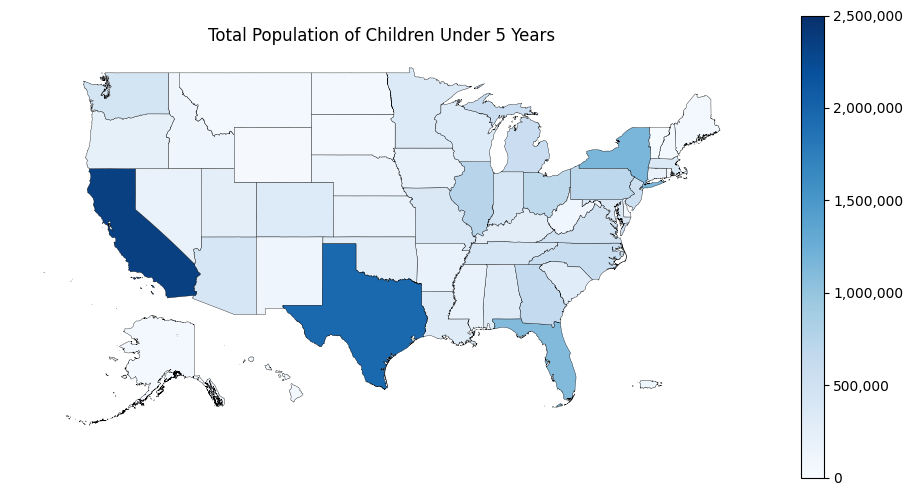

In [7]:
ax = cem.plot_us(
    gdf,
    TOTAL_POPULATION_UNDER_5_VARIABLE,
    figsize=(12, 6),
    legend=True,
    cmap="Blues",
    edgecolor="black",
    linewidth=0.25,
    vmin=-0,
    vmax=2_500_000,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"{x:,.0f}")},
)

ax.axis("off")
ax.set_title("Total Population of Children Under 5 Years")

None

In [8]:
gdf

,STATE,NAME,S0101_C01_002E,geometry
0,01,Alabama,295632,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,02,Alaska,50791,"MULTIPOLYGON (((179.48246 51.98283, 179.48657 ..."
2,04,Arizona,412606,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,05,Arkansas,184580,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."
4,06,California,2350335,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
5,08,Colorado,324246,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
6,09,Connecticut,182122,"MULTIPOLYGON (((-72.22593 41.29384, -72.22523 ..."
7,10,Delaware,54234,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
8,11,District of Columbia,42958,"POLYGON ((-77.11976 38.93434, -77.11253 38.940..."
9,12,Florida,1118794,"MULTIPOLYGON (((-80.62717 25.00040, -80.62600 ..."
